In [35]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
data_set = 'C:\\Users\\enduser\\.keras\\datasets\\imdb.tar.gz'

In [9]:
def directory_data(directory) :
    data = {}
    data['review'] = []

    for file_path in os.listdir(directory) :
        with open(os.path.join(directory, file_path), 'r' , encoding = 'utf-8') as file :
            data['review'].append(file.read())

    return pd.DataFrame.from_dict(data)

In [10]:
def data(directory) :
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df], axis = 0)

In [11]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))

KeyboardInterrupt: 

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS, width = 800, height = 600)
wordcloud.generate(' '.join(review))

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# seaborn을 이용한 pos, neg 개수 분석

In [20]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [21]:
import seaborn as sns

In [ ]:
sentiment = train_df['sentiment'].value_counts()
sentiment

In [ ]:
fig, axe = plt.subplots(ncols = 1)
sns.countplot(x = 'sentiment', data = train_df)
plt.show()

# kaggle 데이터 실습

In [15]:
DATA_IN_PATH = './dataset'
os.listdir(DATA_IN_PATH)

['labeledTrainData.tsv',
 'sampleSubmission.csv',
 'testData.tsv',
 'unlabeledTrainData.tsv']

In [18]:
train_data = pd.read_csv(DATA_IN_PATH + '/labeledTrainData.tsv', delimiter = '\t', 
                        header = 0, quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### EDA

In [24]:
train_length = train_data['review'].apply(len)
type(train_length)

pandas.core.series.Series

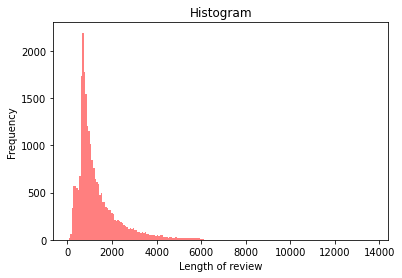

In [29]:
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'alphabet')
plt.title('Histogram')
plt.xlabel('Length of review')
plt.ylabel('Frequency')
plt.show()

In [32]:
print('문장 최대길이 : {}'.format(np.max(train_length)))
print('문장 최소길이 : {}'.format(np.min(train_length)))
print('문장 평균길이 : {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(train_length)))
print('문장 중간 길이 : {}'.format(np.
                             median(train_length)))

# 사분위의 대한 경우는 0 ~ 100 스케일로 되어있음
print('제 1 사분위 길이 : {}'.format(np.percentile(train_length, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(train_length, 75)))

문장 최대길이 : 13710
문장 최소길이 : 54
문장 평균길이 : 1329.71
문장 길이 표준편차 : 1005.22
문장 중간 길이 : 983.0
제 1 사분위 길이 : 705.0
제 3 사분위 길이 : 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x113d7965898>,
 'caps': [<matplotlib.lines.Line2D at 0x113d7965c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x113d7bb05f8>],
 'medians': [<matplotlib.lines.Line2D at 0x113d79652e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x113d7b8acc0>],
 'means': [<matplotlib.lines.Line2D at 0x113d7b8a470>]}

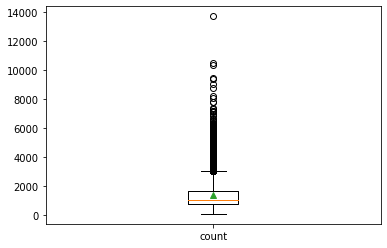

In [31]:
plt.boxplot(train_length, labels = ['count'], 
           showmeans = True)

In [37]:
mytext = ' '.join(train_data['review'])
wordcloud = WordCloud(stopwords = STOPWORDS, width = 800, height = 600)
wordcloud_graph = wordcloud.generate(mytext)

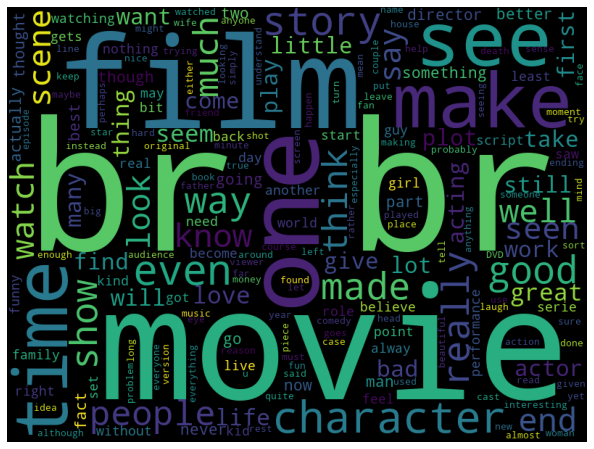

In [38]:
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_graph)
plt.axis('off')
plt.show()

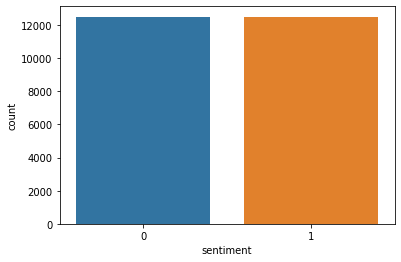

In [40]:
fig, axe = plt.subplots(ncols = 1)
sns.countplot(x = 'sentiment', data = train_data)
plt.show()

In [39]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

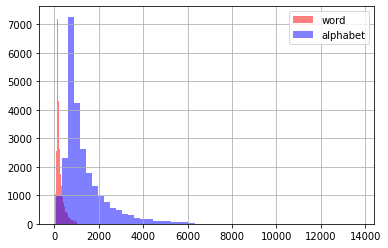

In [42]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))
plt.hist(train_word_counts, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(train_length, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')

plt.legend()
plt.grid()
plt.show()

In [44]:
train_data['review'].apply(lambda x: '?' in x)

0         True
1        False
2        False
3         True
4         True
         ...  
24995    False
24996    False
24997    False
24998     True
24999    False
Name: review, Length: 25000, dtype: bool

In [60]:
# lambda를 사용하면 
qmark = np.mean(train_data['review'].apply(lambda x : '?' in x))
dotmark = np.mean(train_data['review'].apply(lambda x : '.' in x))
capital = np.mean(train_data['review'].apply(lambda x : x[1].isupper()))
digit = np.mean(train_data['review'].apply(lambda x : x.isdigit()))
all_capital = np.mean(train_data['review'].apply(lambda x : x.isupper()))
print('문장 중 ? 비율 : {:2f}%'.format(qmark * 100))
print('문장 중 ? 비율 : {:2f}%'.format(capital * 100))

문장 중 ? 비율 : 29.552000%
문장 중 ? 비율 : 92.844000%


In [63]:
train_data['review'][2][1]

'T'

In [65]:
# !pip install BeautifulSoup4
from bs4 import BeautifulSoup

In [66]:
html_text = '''<a href="https://news.kmib.co.kr/article/view.asp?arcid=0017680970
&amp;code=61121411&amp;sid1=soc&amp;cp=nv2" target="_blank" class="news" data-clk="text" data-pid="005" 
data-gdid="005" data-aid="0e92db1b41bbd35b">수능 출제위원장 “교육 정상화 도움 되도록 출제”</a>

'''

In [71]:
mytext = BeautifulSoup(html_text, 'html').get_text()
mytext

'수능 출제위원장 “교육 정상화 도움 되도록 출제”\n'

In [70]:
import re

In [73]:
mytext_re = re.sub("[^a-zA-Z]", " ". mytext)
mytext_re.replace('\\s+', ' ')

AttributeError: 'str' object has no attribute 'mytext'

In [74]:
import json

In [76]:
from nltk.corpus import stopwords

In [79]:
review = train_data['review'][0]
print(review)
# 태그 없애고 text만 가져오기
review_text = BeautifulSoup(review, 'html').get_text()
print(review_text)

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [80]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
stop_words = set(stopwords.words('english'))

review_text = review_text.lower()
word = review_text.split()
words = [w for w in word if not w in stop_words]

In [89]:
def preprocessing(review, remove_stopword = True) :
    review_text = BeautifulSoup(review, 'html').get_text()
    
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    
    word = review_text.lower().split()
    
    if remove_stopword :
        stop_words = set(stopwords.words('english'))
        word = [w for w in word if not w in stop_words]
        
        clean_review = ' '.join(word)
    else :
        clean_review = ' '.join(word)
        
    return clean_review

In [92]:
clean_train_reviews = []
for review in train_data['review'] :
    clean_train_reviews.append(preprocessing(review, remove_stopword = True))
    
len(clean_train_reviews)

25000

In [150]:
clean_train_df = pd.DataFrame({'review' :clean_train_reviews, 'sentiment' : train_data['sentiment']})
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [153]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [154]:
tokenizer.fit_on_texts(clean_train_reviews) # 토큰화한 각 단어에 따라 인덱스처럼 숫자가 부여된 딕셔너리 생성  ex) {'I' : 1, 'love' : 2, '현조' : 3}
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews) # 위의 딕셔너리를 이용하여 document마다 단어를 숫자로 바꿔주기
# tokenizer.fit_on_texts(clean_train_df['review'])
tokenizer.word_index # 클래스.함수.변수이름이 아니라 클래스.변수이름인 경우 -> 해당 변수가 전역변수(global) (__init__ 안에 있는 변수는 모두 global 변수)

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [155]:
text_sequences[0]
word_vocab = dict(tokenizer.word_index)
word_vocab['<PAD'] = 0 # padding 값
word_vocab['<PAD']

0

In [156]:
# 숫자를 문자로 바꿔줄 때를 대비하여 따로 저장해두는 것
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)
print(data_configs)

{'vocab': {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'thing

### 문장 길이를 맞추기 위해 최대 문장 길이 선언
아래와 같이 문장의 길이가 174보다 크면 잘라내고, 174보다 작으면 padding을 통해 0으로 채운다.

=> 잘려낸 길이에 중요한 단어가 있을 경우는 감수해야 하며, 맢을 잘라낸 경우와 뒤를 잘라낸 경우를 비교하여 돌려봐야 한다.

In [157]:
MAX_SEQUENCE_LENGTH = 174
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(text_sequences, 
                                                            maxlen = MAX_SEQUENCE_LENGTH, 
                                                            padding = 'post')

In [158]:
train_inputs.shape
train_inputs[0]

array([  411,   793,  3342,    17,   441,   600,  1500,    15,  4424,
        1851,   998,   146,   342,  1442,   743,  2424,     4,  8815,
         418,    70,   637,    69,   237,    94,   541,  8815, 26055,
       26056,   120,     1,  8815,   323,     8,    47,    20,   323,
         167,    10,   207,   633,   635,     2,   116,   291,   382,
         121, 15535,  3315,  1501,   574,   734, 10013,   923, 11578,
         822,  1239,  1408,   360,  8815,   221,    15,   576,  8815,
       22224,  2274, 13426,   734, 10013,    27, 28606,   340,    16,
          41, 18687,  1500,   388, 11243,   165,  3962,  8815,   115,
         627,   499,    79,     4,  8815,  1430,   380,  2163,   114,
        1919,  2503,   574,    17,    60,   100,  4875,  5100,   260,
        1268, 26057,    15,   574,   493,   744,   637,   631,     3,
         394,   164,   446,   114,   615,  3266,  1160,   684,    48,
        1175,   224,     1,    16,     4,  8815,     3,   507,    62,
          25,    16,

In [159]:
train_labels = np.array(train_data['sentiment'])
type(train_labels)
train_labels.shape

(25000,)

In [160]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [163]:
np.save(open('./data_out/' + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open('./data_out/' + TRAIN_LABEL_DATA, 'wb'), train_labels)

clean_train_df.to_csv('./data_out/' + TRAIN_CLEAN_DATA, index = False)

json.dump(data_configs, open('./data_out/' + DATA_CONFIGS, 'w'))

In [164]:
test_data = pd.read_csv('./dataset/testData.tsv', header = 0, delimiter = '\t', quoting = 3)
test_data.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [165]:
clean_test_reviews = []
for review in test_data['review'] :
    clean_test_reviews.append(preprocessing(review, remove_stopword=True))

C:\Users\enduser\AppData\Roaming\Python\Python36\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [166]:
clean_test_reviews

['naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty',
 'movie disaster within disaster film full great action scenes meaningful throw away sense reality let see word wise lava burns steam burns stand next lava diverting minor lava flow difficult let alone significant one scares think might actually believe saw movie even worse significant amount talent went making film mean acting actually good effects average hard believe somebody read scripts allowed talent wasted guess suggestion would movie start 

In [167]:
clean_test_df = pd.DataFrame({'review':clean_test_reviews, 'id':test_data['id']})
# clean_test_df.head()

In [168]:
text_seq = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = tf.keras.preprocessing.sequence.pad_sequences(text_seq, 
                                                          maxlen = MAX_SEQUENCE_LENGTH, 
                                                          padding = 'post')
test_id = np.array(test_data['id'])

In [169]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'
TEST_CLEAN_DATA = 'test_clean.csv'

np.save(open('./data_out/' + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open('./data_out/' + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv('./data_out/' + TEST_CLEAN_DATA, index = False)